# 模型正则化：限制参数的大小

以线性回归为例：

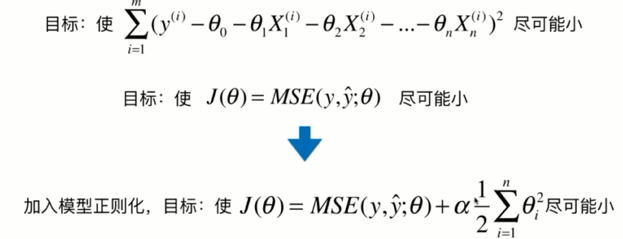

这种模型正则化的方式通常称为岭回归(L2正则化)

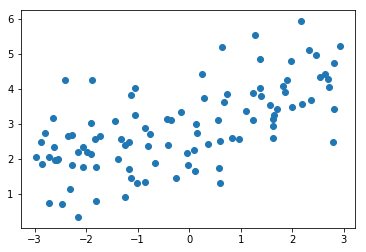

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",LinearRegression())
    ])

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.9401087009438

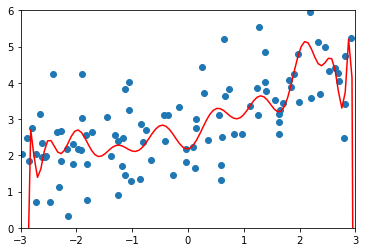

In [16]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot, y_plot, color="r")
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

# 使用岭回归

In [21]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

1.3233492754155471


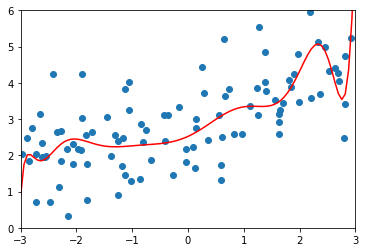

In [25]:
ridge1_reg = RidgeRegression(degree=20, alpha=0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
print(mean_squared_error(y_test, y1_predict))

plot_model(ridge1_reg)

1.1888759304218448


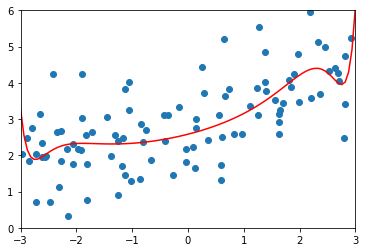

In [26]:
ridge2_reg = RidgeRegression(degree=20, alpha=1)
ridge2_reg.fit(X_train, y_train)

y2_predict = ridge2_reg.predict(X_test)
print(mean_squared_error(y_test, y2_predict))

plot_model(ridge2_reg)

1.3196456113086197


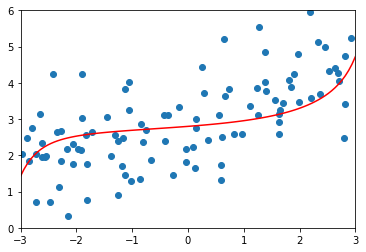

In [27]:
ridge3_reg = RidgeRegression(degree=20, alpha=100)
ridge3_reg.fit(X_train, y_train)

y3_predict = ridge3_reg.predict(X_test)
print(mean_squared_error(y_test, y3_predict))

plot_model(ridge3_reg)